# Load Data

In [0]:
import pandas as pd
from pyspark.sql import *
from pyspark.sql.functions import col

import numpy as np
import math
from scipy import stats


# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot


# We will use matplotlib to plot figures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [0]:
fp = "/FileStore/tables/winequality_red.csv"
df_wine = spark.read.format("csv").option("header","true").option("inferSchema", "true").load(fp).toPandas()
df_wine.head()

Out[247]:

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
#outliers
#df_wine = df_wine.drop([151,1235, 92,652,723,1079,1081,1435,1434,480,86,258])

# Data Quality/Prep

In [0]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 fixed acidity 1599 non-null float64
 1 volatile acidity 1599 non-null float64
 2 citric acid 1599 non-null float64
 3 residual sugar 1599 non-null float64
 4 chlorides 1599 non-null float64
 5 free sulfur dioxide 1599 non-null float64
 6 total sulfur dioxide 1599 non-null float64
 7 density 1599 non-null float64
 8 pH 1599 non-null float64
 9 sulphates 1599 non-null float64
 10 alcohol 1599 non-null float64
 11 quality 1599 non-null int32 
dtypes: float64(11), int32(1)
memory usage: 143.8 KB

In [0]:
df_wine.describe()

Out[250]:

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
df_wine.isnull().values.any()

Out[251]: False

# Data Analysis

In [0]:
df_wine = df_wine.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid':'citric_acid', 'residual sugar':'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'})
df_wine.head()

Out[252]:

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Matrix Scatter Plot

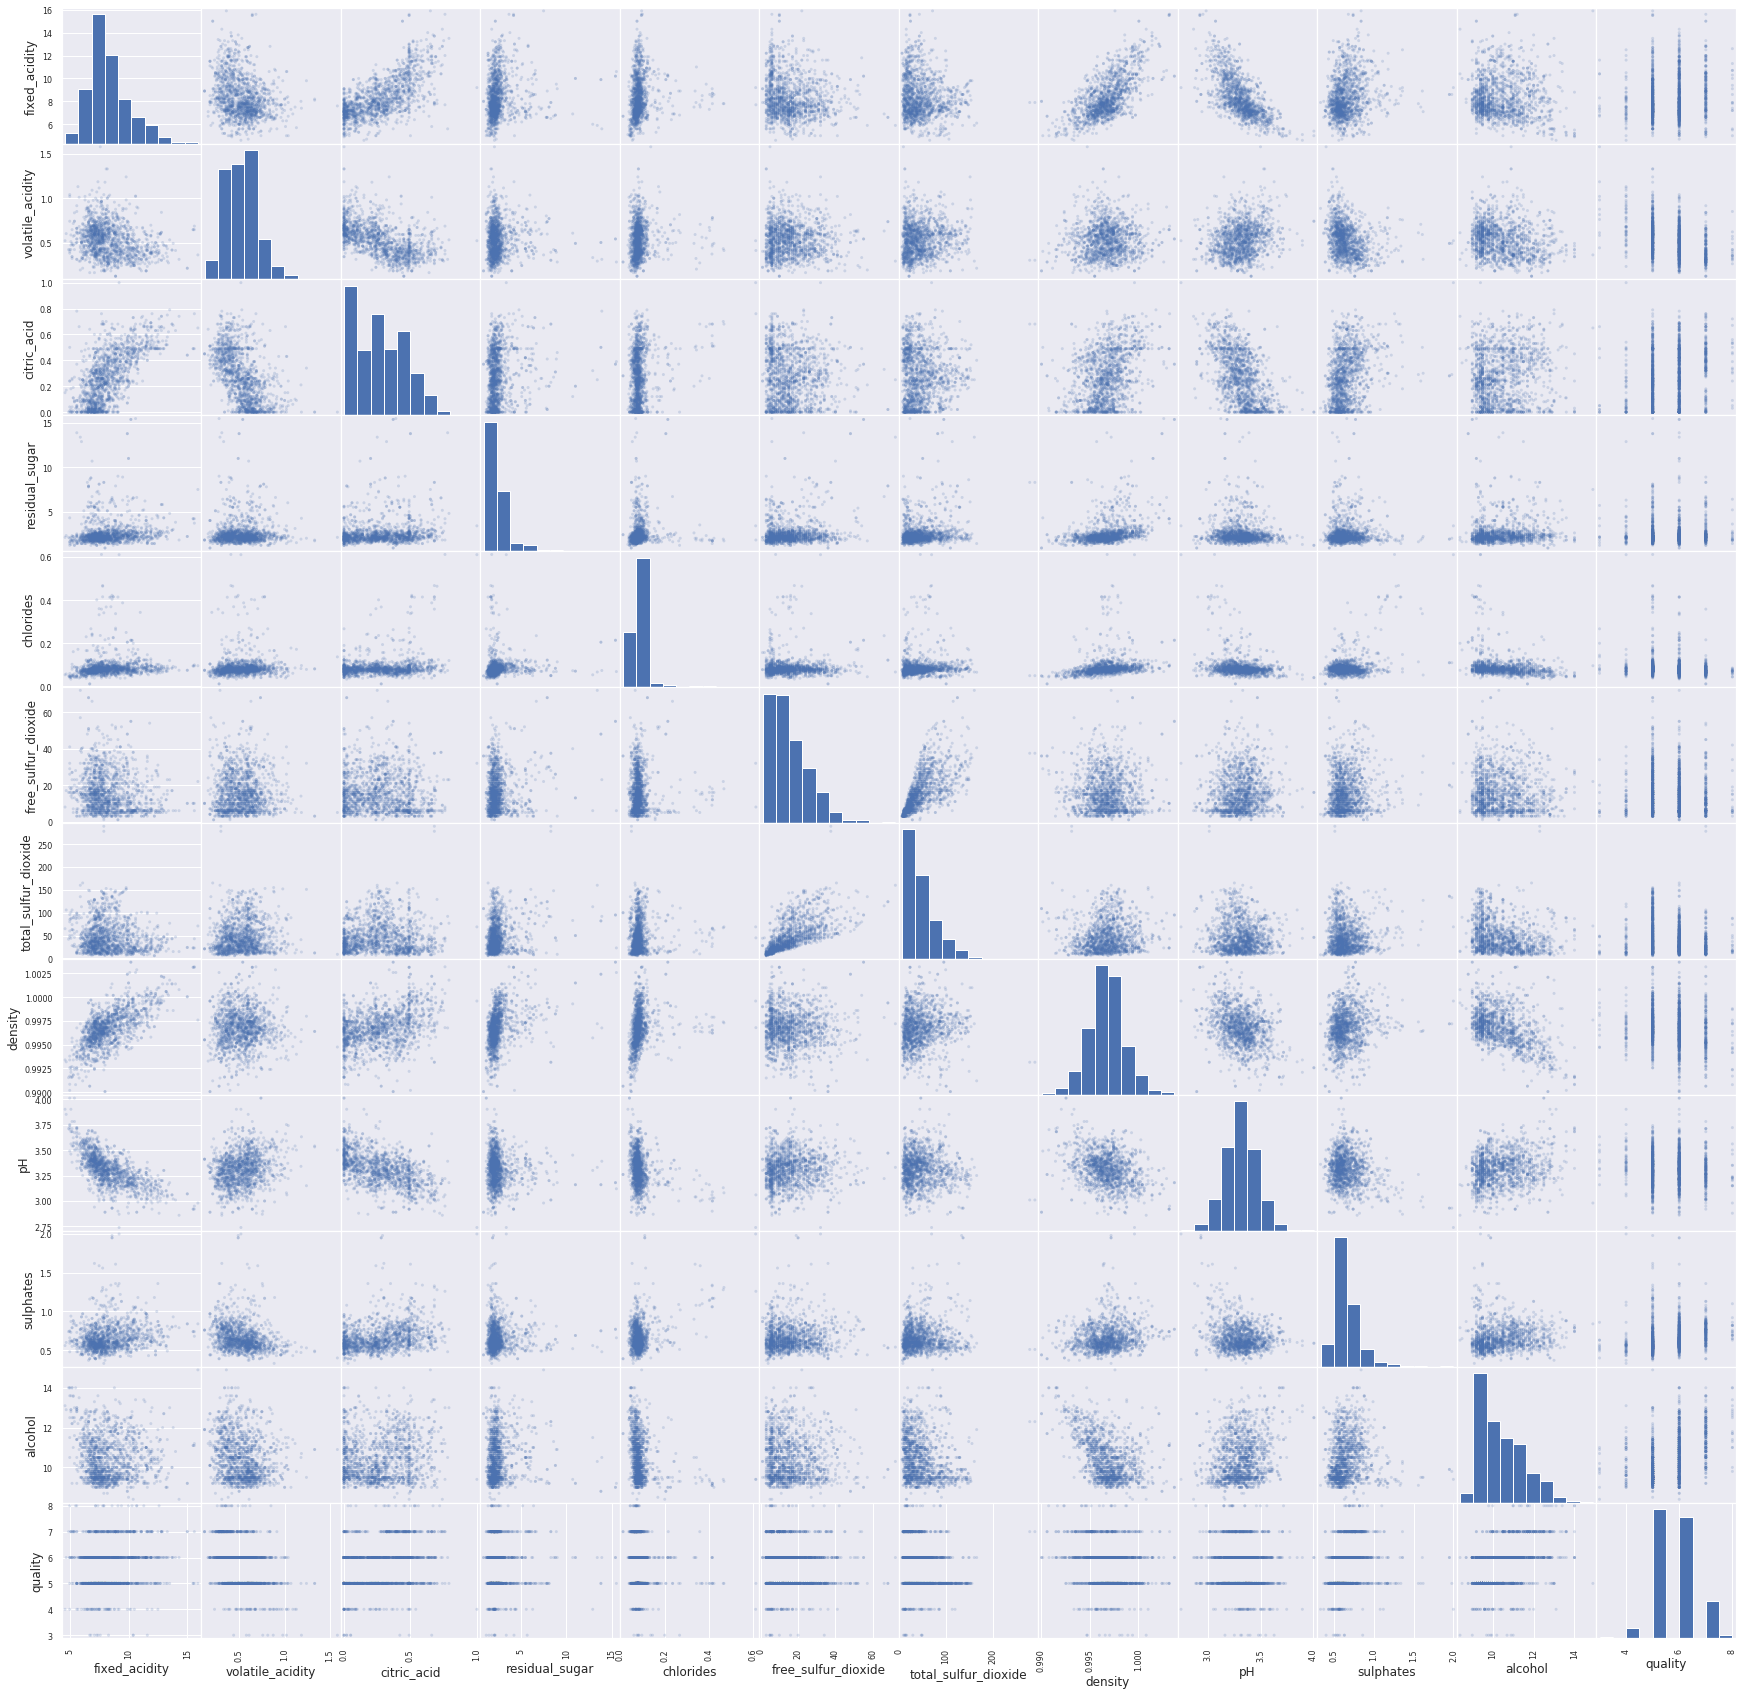

In [0]:
pd.plotting.scatter_matrix(df_wine, alpha=0.2, figsize =(30,30))
None

## Plot Each Variable

Out[254]:

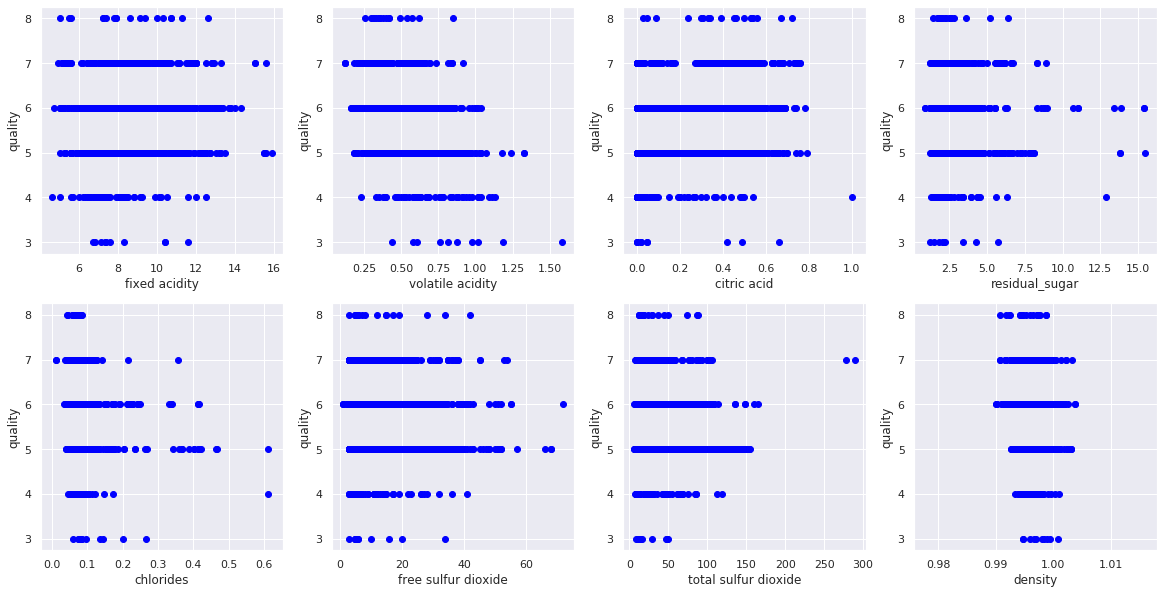

Text(0, 0.5, 'quality')

In [0]:
fig = plt.figure(figsize=(20,10)) 

ax1 = fig.add_subplot(241) 
ax1.scatter(df_wine.fixed_acidity, df_wine.quality, marker='o',color='blue')
plt.xlabel('fixed acidity')
plt.ylabel('quality')

ax2 = fig.add_subplot(242) 
ax2.scatter(df_wine.volatile_acidity, df_wine.quality, marker='o',color='blue')
plt.xlabel('volatile acidity')
plt.ylabel('quality')

ax3 = fig.add_subplot(243) 
ax3.scatter(df_wine.citric_acid, df_wine.quality, marker='o',color='blue')
plt.xlabel('citric acid')
plt.ylabel('quality')

ax4 = fig.add_subplot(244) 
ax4.scatter(df_wine.residual_sugar, df_wine.quality, marker='o',color='blue')
plt.xlabel('residual_sugar')
plt.ylabel('quality')

ax5 = fig.add_subplot(245) 
ax5.scatter(df_wine.chlorides, df_wine.quality, marker='o',color='blue')
plt.xlabel('chlorides')
plt.ylabel('quality')

ax6 = fig.add_subplot(246) 
ax6.scatter(df_wine.free_sulfur_dioxide, df_wine.quality, marker='o',color='blue')
plt.xlabel('free sulfur dioxide')
plt.ylabel('quality')

ax7 = fig.add_subplot(247) 
ax7.scatter(df_wine.total_sulfur_dioxide, df_wine.quality, marker='o',color='blue')
plt.xlabel('total sulfur dioxide')
plt.ylabel('quality')

ax8 = fig.add_subplot(248) 
ax8.scatter(df_wine.density, df_wine.quality, marker='o',color='blue')
plt.xlabel('density')
plt.ylabel('quality')


Out[255]:

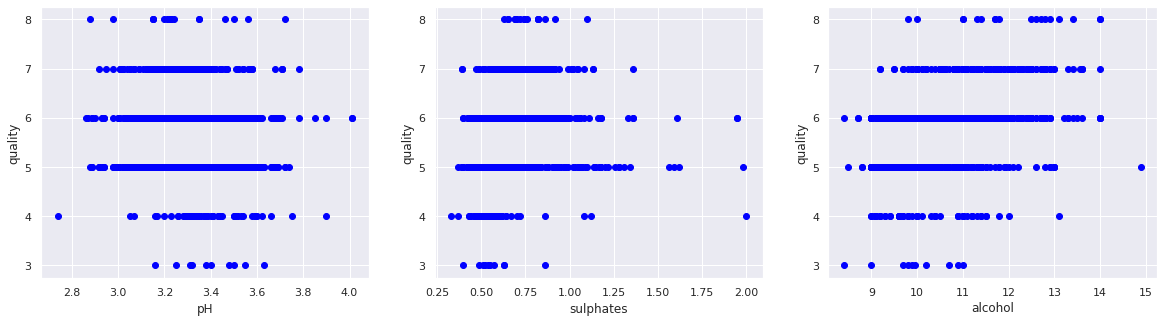

Text(0, 0.5, 'quality')

In [0]:
fig = plt.figure(figsize=(20,5)) 

ax9 = fig.add_subplot(131) 
ax9.scatter(df_wine.pH, df_wine.quality, marker='o',color='blue')
plt.xlabel('pH')
plt.ylabel('quality')

ax10 = fig.add_subplot(132) 
ax10.scatter(df_wine.sulphates, df_wine.quality, marker='o',color='blue')
plt.xlabel('sulphates')
plt.ylabel('quality')

ax10 = fig.add_subplot(133) 
ax10.scatter(df_wine.alcohol, df_wine.quality, marker='o',color='blue')
plt.xlabel('alcohol')
plt.ylabel('quality')


## Find Correlation between input variables and response

In [0]:
abs(df_wine.corr().loc['quality'])

Out[256]: fixed_acidity 0.124052
volatile_acidity 0.390558
citric_acid 0.226373
residual_sugar 0.013732
chlorides 0.128907
free_sulfur_dioxide 0.050656
total_sulfur_dioxide 0.185100
density 0.174919
pH 0.057731
sulphates 0.251397
alcohol 0.476166
quality 1.000000
Name: quality, dtype: float64

# Build  model

## Use stepwise forward regression to build predictive model

split to test and train set

In [0]:
#import random
#from sklearn.model_selection import train_test_split
#sdf_wine = spark.createDataFrame(df_wine)

#random.seed(10)
#dfwine_train, dfwine_test = sdf_wine.randomSplit([0.8, 0.2])

#dfwine_train = dfwine_train.toPandas()
#df_wine_test = dfwine_test.toPandas()

### Alcohol

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())


OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.227
Model: OLS Adj. R-squared: 0.226
Method: Least Squares F-statistic: 468.3
Date: Mon, 14 Dec 2020 Prob (F-statistic): 2.83e-91
Time: 04:44:14 Log-Likelihood: -1721.1
No. Observations: 1599 AIC: 3446.
Df Residuals: 1597 BIC: 3457.
Df Model: 1 
Covariance Type: nonrobust 
==============================================================================
 coef std err t P>|t| [0.025 0.975]
------------------------------------------------------------------------------
Intercept 1.8750 0.175 10.732 0.000 1.532 2.218
alcohol 0.3608 0.017 21.639 0.000 0.328 0.394
==============================================================================
Omnibus: 38.501 Durbin-Watson: 1.748
Prob(Omnibus): 0.000 Jarque-Bera (JB): 71.758
Skew: -0.154 Prob(JB): 2.62e-16
Kurtosis: 3.991 Cond. No. 104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

###  Volatile Acidity

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.317
Model: OLS Adj. R-squared: 0.316
Method: Least Squares F-statistic: 370.4
Date: Mon, 14 Dec 2020 Prob (F-statistic): 7.35e-133
Time: 04:44:14 Log-Likelihood: -1621.8
No. Observations: 1599 AIC: 3250.
Df Residuals: 1596 BIC: 3266.
Df Model: 2 
Covariance Type: nonrobust 
====================================================================================
 coef std err t P>|t| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept 3.0955 0.184 16.778 0.000 2.734 3.457
alcohol 0.3138 0.016 19.604 0.000 0.282 0.345
volatile_acidity -1.3836 0.095 -14.524 0.000 -1.570 -1.197
==============================================================================
Omnibus: 17.005 Durbin-Watson: 1.739
Prob(Omnibus): 0.000 Jarque-Bera (JB): 25.998
Skew: -0.064 Prob(JB): 2.26e-06
Kurtosis: 3.611 Cond. No. 121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

### Sulphates

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.336
Model: OLS Adj. R-squared: 0.335
Method: Least Squares F-statistic: 268.9
Date: Mon, 14 Dec 2020 Prob (F-statistic): 3.16e-141
Time: 04:44:14 Log-Likelihood: -1599.4
No. Observations: 1599 AIC: 3207.
Df Residuals: 1595 BIC: 3228.
Df Model: 3 
Covariance Type: nonrobust 
====================================================================================
 coef std err t P>|t| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept 2.6108 0.196 13.342 0.000 2.227 2.995
alcohol 0.3092 0.016 19.566 0.000 0.278 0.340
volatile_acidity -1.2214 0.097 -12.591 0.000 -1.412 -1.031
sulphates 0.6790 0.101 6.737 0.000 0.481 0.877
==============================================================================
Omnibus: 22.086 Durbin-Watson: 1.736
Prob(Omnibus): 0.000 Jarque-Bera (JB): 34.420
Skew: -0.109 Prob(JB): 3.36e-08
Kurtosis: 3.685 Cond. No. 133.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

### Citric Acid

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates + citric_acid', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.336
Model: OLS Adj. R-squared: 0.334
Method: Least Squares F-statistic: 201.8
Date: Mon, 14 Dec 2020 Prob (F-statistic): 4.22e-140
Time: 04:44:14 Log-Likelihood: -1599.1
No. Observations: 1599 AIC: 3208.
Df Residuals: 1594 BIC: 3235.
Df Model: 4 
Covariance Type: nonrobust 
====================================================================================
 coef std err t P>|t| [0.025 0.975]
------------------------------------------------------------------------------------
Intercept 2.6459 0.201 13.160 0.000 2.252 3.040
alcohol 0.3091 0.016 19.553 0.000 0.278 0.340
volatile_acidity -1.2651 0.113 -11.229 0.000 -1.486 -1.044
sulphates 0.6955 0.103 6.746 0.000 0.493 0.898
citric_acid -0.0791 0.104 -0.762 0.446 -0.283 0.124
==============================================================================
Omnibus: 21.836 Durbin-Watson: 1.735
Prob(Omnibus): 0.000 Jarque-Bera (JB): 34.234
Skew: -0.104 Prob(JB): 3.68e-08
Kurtosis: 3.686 Cond. No. 139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

drop citric acid as adjusted R-squared lowered

### Total Sulfur Dioxide

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.344
Model: OLS Adj. R-squared: 0.342
Method: Least Squares F-statistic: 208.8
Date: Mon, 14 Dec 2020 Prob (F-statistic): 4.23e-144
Time: 04:44:14 Log-Likelihood: -1589.8
No. Observations: 1599 AIC: 3190.
Df Residuals: 1594 BIC: 3217.
Df Model: 4 
Covariance Type: nonrobust 
========================================================================================
 coef std err t P>|t| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept 2.8258 0.201 14.081 0.000 2.432 3.219
alcohol 0.2953 0.016 18.419 0.000 0.264 0.327
volatile_acidity -1.1986 0.097 -12.407 0.000 -1.388 -1.009
sulphates 0.7121 0.101 7.085 0.000 0.515 0.909
total_sulfur_dioxide -0.0022 0.001 -4.376 0.000 -0.003 -0.001
==============================================================================
Omnibus: 28.390 Durbin-Watson: 1.750
Prob(Omnibus): 0.000 Jarque-Bera (JB): 44.340
Skew: -0.159 Prob(JB): 2.35e-10
Kurtosis: 3.751 Cond. No. 741.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

### Density

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + density', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.344
Model: OLS Adj. R-squared: 0.342
Method: Least Squares F-statistic: 167.0
Date: Mon, 14 Dec 2020 Prob (F-statistic): 5.75e-143
Time: 04:44:14 Log-Likelihood: -1589.7
No. Observations: 1599 AIC: 3191.
Df Residuals: 1593 BIC: 3224.
Df Model: 5 
Covariance Type: nonrobust 
========================================================================================
 coef std err t P>|t| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept -2.3554 10.344 -0.228 0.820 -22.646 17.935
alcohol 0.3001 0.019 16.038 0.000 0.263 0.337
volatile_acidity -1.1968 0.097 -12.379 0.000 -1.386 -1.007
sulphates 0.7011 0.103 6.813 0.000 0.499 0.903
total_sulfur_dioxide -0.0022 0.001 -4.345 0.000 -0.003 -0.001
density 5.1533 10.287 0.501 0.616 -15.024 25.331
==============================================================================
Omnibus: 28.903 Durbin-Watson: 1.752
Prob(Omnibus): 0.000 Jarque-Bera (JB): 45.227
Skew: -0.162 Prob(JB): 1.51e-10
Kurtosis: 3.758 Cond. No. 5.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

leave as r-squared isnt worse

### Chlorides

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + density + chlorides', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.352
Model: OLS Adj. R-squared: 0.349
Method: Least Squares F-statistic: 143.9
Date: Mon, 14 Dec 2020 Prob (F-statistic): 6.34e-146
Time: 04:44:14 Log-Likelihood: -1580.2
No. Observations: 1599 AIC: 3174.
Df Residuals: 1592 BIC: 3212.
Df Model: 6 
Covariance Type: nonrobust 
========================================================================================
 coef std err t P>|t| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept -3.1625 10.288 -0.307 0.759 -23.342 17.017
alcohol 0.2828 0.019 14.861 0.000 0.245 0.320
volatile_acidity -1.1397 0.097 -11.746 0.000 -1.330 -0.949
sulphates 0.9024 0.112 8.040 0.000 0.682 1.123
total_sulfur_dioxide -0.0023 0.001 -4.508 0.000 -0.003 -0.001
density 6.1347 10.232 0.600 0.549 -13.934 26.203
chlorides -1.7100 0.392 -4.364 0.000 -2.479 -0.941
==============================================================================
Omnibus: 25.801 Durbin-Watson: 1.748
Prob(Omnibus): 0.000 Jarque-Bera (JB): 38.640
Skew: -0.157 Prob(JB): 4.07e-09
Kurtosis: 3.694 Cond. No. 5.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

### Fixed Acidity

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + density + fixed_acidity', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.347
Model: OLS Adj. R-squared: 0.345
Method: Least Squares F-statistic: 141.0
Date: Mon, 14 Dec 2020 Prob (F-statistic): 1.89e-143
Time: 04:44:14 Log-Likelihood: -1586.0
No. Observations: 1599 AIC: 3186.
Df Residuals: 1592 BIC: 3224.
Df Model: 6 
Covariance Type: nonrobust 
========================================================================================
 coef std err t P>|t| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept 28.0859 15.171 1.851 0.064 -1.672 57.844
alcohol 0.2813 0.020 14.127 0.000 0.242 0.320
volatile_acidity -1.1128 0.101 -10.990 0.000 -1.311 -0.914
sulphates 0.7085 0.103 6.897 0.000 0.507 0.910
total_sulfur_dioxide -0.0020 0.001 -3.909 0.000 -0.003 -0.001
density -25.5862 15.212 -1.682 0.093 -55.425 4.252
fixed_acidity 0.0404 0.015 2.738 0.006 0.011 0.069
==============================================================================
Omnibus: 30.091 Durbin-Watson: 1.756
Prob(Omnibus): 0.000 Jarque-Bera (JB): 46.502
Skew: -0.175 Prob(JB): 7.98e-11
Kurtosis: 3.759 Cond. No. 7.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

drop as yields a worse r-squared

### Free Sulfur dioxide

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + chlorides + density + free_sulfur_dioxide', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.353
Model: OLS Adj. R-squared: 0.350
Method: Least Squares F-statistic: 123.9
Date: Mon, 14 Dec 2020 Prob (F-statistic): 1.73e-145
Time: 04:44:14 Log-Likelihood: -1578.7
No. Observations: 1599 AIC: 3173.
Df Residuals: 1591 BIC: 3216.
Df Model: 7 
Covariance Type: nonrobust 
========================================================================================
 coef std err t P>|t| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept -4.3151 10.302 -0.419 0.675 -24.523 15.893
alcohol 0.2818 0.019 14.810 0.000 0.244 0.319
volatile_acidity -1.1290 0.097 -11.620 0.000 -1.320 -0.938
sulphates 0.8977 0.112 8.001 0.000 0.678 1.118
total_sulfur_dioxide -0.0031 0.001 -4.527 0.000 -0.004 -0.002
chlorides -1.6986 0.392 -4.337 0.000 -2.467 -0.930
density 7.2766 10.246 0.710 0.478 -12.820 27.373
free_sulfur_dioxide 0.0037 0.002 1.752 0.080 -0.000 0.008
==============================================================================
Omnibus: 25.861 Durbin-Watson: 1.749
Prob(Omnibus): 0.000 Jarque-Bera (JB): 39.500
Skew: -0.149 Prob(JB): 2.65e-09
Kurtosis: 3.710 Cond. No. 5.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

### pH

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + chlorides + density + free_sulfur_dioxide + pH', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.360
Model: OLS Adj. R-squared: 0.356
Method: Least Squares F-statistic: 111.6
Date: Mon, 14 Dec 2020 Prob (F-statistic): 6.01e-148
Time: 04:44:14 Log-Likelihood: -1570.5
No. Observations: 1599 AIC: 3159.
Df Residuals: 1590 BIC: 3207.
Df Model: 8 
Covariance Type: nonrobust 
========================================================================================
 coef std err t P>|t| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept 7.3113 10.647 0.687 0.492 -13.572 28.195
alcohol 0.2869 0.019 15.119 0.000 0.250 0.324
volatile_acidity -1.0120 0.101 -10.028 0.000 -1.210 -0.814
sulphates 0.8880 0.112 7.951 0.000 0.669 1.107
total_sulfur_dioxide -0.0035 0.001 -5.074 0.000 -0.005 -0.002
chlorides -2.0208 0.398 -5.080 0.000 -2.801 -1.241
density -2.8429 10.498 -0.271 0.787 -23.434 17.748
free_sulfur_dioxide 0.0051 0.002 2.381 0.017 0.001 0.009
pH -0.4905 0.121 -4.051 0.000 -0.728 -0.253
==============================================================================
Omnibus: 23.891 Durbin-Watson: 1.749
Prob(Omnibus): 0.000 Jarque-Bera (JB): 34.701
Skew: -0.154 Prob(JB): 2.92e-08
Kurtosis: 3.652 Cond. No. 5.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

### Residual Sugar

In [0]:
# Initialize the regression model
m = sm.ols('quality ~ alcohol + volatile_acidity + sulphates + total_sulfur_dioxide + chlorides + free_sulfur_dioxide + density + pH + residual_sugar', data = df_wine)
# Fit the model
m = m.fit()
print(m.summary())

OLS Regression Results 
==============================================================================
Dep. Variable: quality R-squared: 0.360
Model: OLS Adj. R-squared: 0.356
Method: Least Squares F-statistic: 99.22
Date: Mon, 14 Dec 2020 Prob (F-statistic): 4.56e-147
Time: 04:44:14 Log-Likelihood: -1570.1
No. Observations: 1599 AIC: 3160.
Df Residuals: 1589 BIC: 3214.
Df Model: 9 
Covariance Type: nonrobust 
========================================================================================
 coef std err t P>|t| [0.025 0.975]
----------------------------------------------------------------------------------------
Intercept 12.0575 12.009 1.004 0.316 -11.498 35.613
alcohol 0.2810 0.020 13.912 0.000 0.241 0.321
volatile_acidity -1.0128 0.101 -10.035 0.000 -1.211 -0.815
sulphates 0.9024 0.113 7.989 0.000 0.681 1.124
total_sulfur_dioxide -0.0036 0.001 -5.143 0.000 -0.005 -0.002
chlorides -2.0491 0.399 -5.133 0.000 -2.832 -1.266
free_sulfur_dioxide 0.0049 0.002 2.279 0.023 0.001 0.009
density -7.5668 11.865 -0.638 0.524 -30.839 15.706
pH -0.4920 0.121 -4.063 0.000 -0.730 -0.254
residual_sugar 0.0115 0.013 0.855 0.393 -0.015 0.038
==============================================================================
Omnibus: 25.567 Durbin-Watson: 1.752
Prob(Omnibus): 0.000 Jarque-Bera (JB): 37.379
Skew: -0.164 Prob(JB): 7.64e-09
Kurtosis: 3.673 Cond. No. 6.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

#  Test model

In [0]:
intercept = m.params[0]
slope = m.params[1:]

print(intercept)
print(slope)

12.057501277076604
alcohol 0.281002
volatile_acidity -1.012792
sulphates 0.902443
total_sulfur_dioxide -0.003569
chlorides -2.049094
free_sulfur_dioxide 0.004874
density -7.566836
pH -0.491991
residual_sugar 0.011505
dtype: float64

In [0]:
slope.alcohol

Out[270]: 0.2810021529483798

In [0]:
df_wine['quality_est'] = intercept + slope.alcohol*df_wine['alcohol'] + slope.volatile_acidity*df_wine['volatile_acidity'] + slope.sulphates*df_wine['sulphates'] + slope.total_sulfur_dioxide*df_wine['total_sulfur_dioxide'] + slope.chlorides*df_wine['chlorides'] + slope.free_sulfur_dioxide*df_wine['free_sulfur_dioxide'] + slope.density*df_wine['density'] + slope.pH*df_wine['pH']+ slope.residual_sugar*df_wine['residual_sugar']

In [0]:
df_wine.head()

Out[272]:

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_est
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.016665
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.128584
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.198508
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.681678
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.016665


In [0]:
df_wine['quality_est_rounded'] = round(df_wine['quality_est'])
df_wine.head()

Out[273]:

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_est,quality_est_rounded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.016665,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.128584,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.198508,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.681678,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.016665,5.0


In [0]:
df_wine['residuals'] = df_wine['quality_est_rounded'] - df_wine['quality']
df_wine.head()

Out[274]:

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_est,quality_est_rounded,residuals
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.016665,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.128584,5.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.198508,5.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.681678,6.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.016665,5.0,0.0


In [0]:
correct_pred = df_wine[df_wine['residuals']==0].count().max()
incorrect_pred = df_wine[df_wine['residuals'] != 0].count().max()
accuracy = correct_pred/(df_wine.count().max())
print("Number of correct predictions: ", correct_pred)
print("Number of incorrect predictions: ", incorrect_pred)
print("Accuracy: ", round(accuracy*100, 2), "%")

Number of correct predictions: 953
Number of incorrect predictions: 646
Accuracy: 59.6 %

Out[276]:

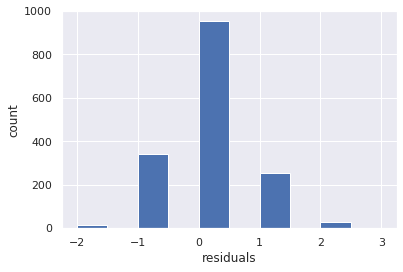

Text(0, 0.5, 'count')

In [0]:
plt.hist(df_wine.residuals)
plt.xlabel('residuals')
plt.ylabel('count')

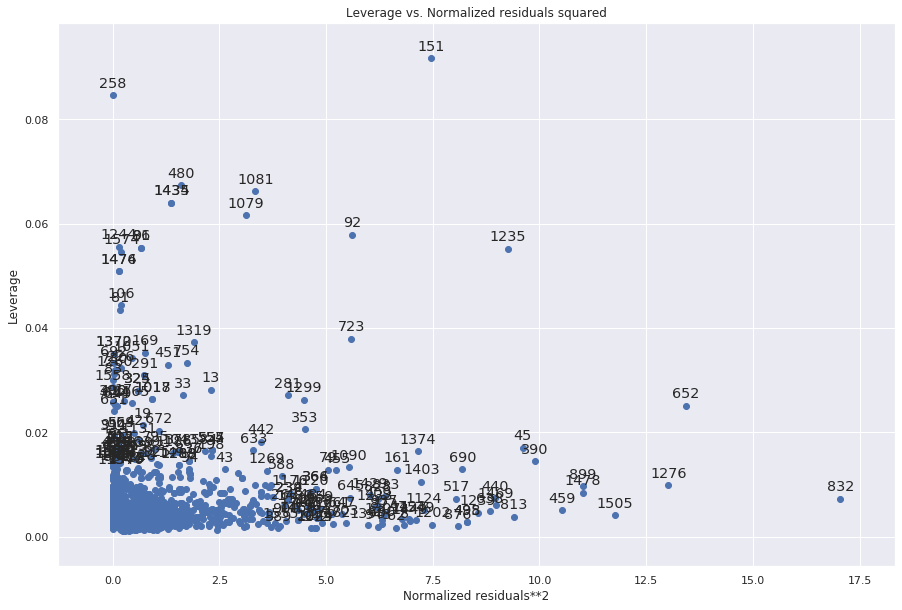

In [0]:
fig, ax = plt.subplots(figsize=(15,10))
fig = plot_leverage_resid2(m, ax=ax)

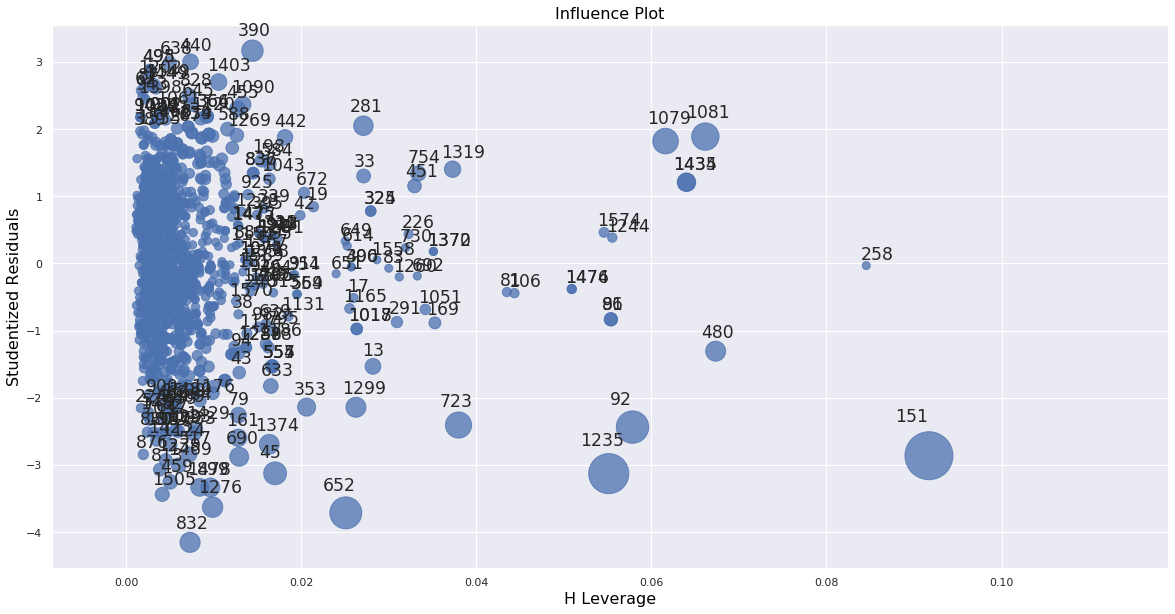

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
fig = influence_plot(m, ax = ax) 